# DC1d modelling and inversion
We want to use direct-current (DC) modelling for 1D layered Earth models.
This is readily implemented in the pyGIMLi (Python Geophysical Modelling and Inversion module).
We make use of the `PyCall` library to call the codes from Julia.

In [38]:
using PyCall
using PyPlot

In [39]:
pg=pyimport("pygimli")

PyObject <module 'pygimli' from 'C:\\Guenther.T\\src\\gimli\\gimli\\pygimli\\__init__.py'>

In [40]:
pos=pg.Pos([1, 1, 0])
mesh=pg.createGrid(5,5)
print(mesh)

PyObject <pygimli.core._pygimli_.Mesh object at 0x000000005CB99AC0>

In [42]:
# We define a AB/2 vector going from 1 to 1000m
ab2 = 10 .^ (0:0.1:3);

In [43]:
# Now we define a 1D DC forward operator, for MN/2 we use AB/2 / 3
number_of_layers = 3
f = pg.core.DC1dModelling(number_of_layers, ab2, ab2/3)

PyObject <pygimli.core._pygimli_.DC1dModelling object at 0x000000005DB20630>

In [56]:
rhoa = f([5, 5, 100, 20, 100]).array();  # two thicknesses, three resistivities

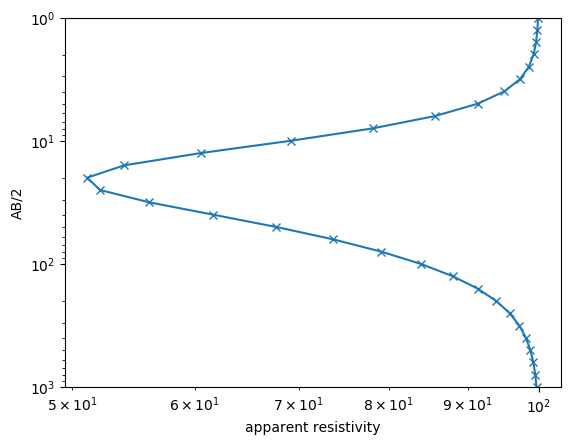

In [57]:
loglog(rhoa, ab2, "x-")
ylim(ab2[end], ab2[1])
xlabel("apparent resistivity")
ylabel("AB/2");

Whereas `DC1dModelling` gets thickness and resistivity values, there is a variant `DC1dRhoModelling` for only resistivity using a predefined thickness vector. This is made for smoothness-constrained inversion.

In [58]:
thk = ones(30)
fRho = pg.core.DC1dRhoModelling(thk, ab2, ab2/3);

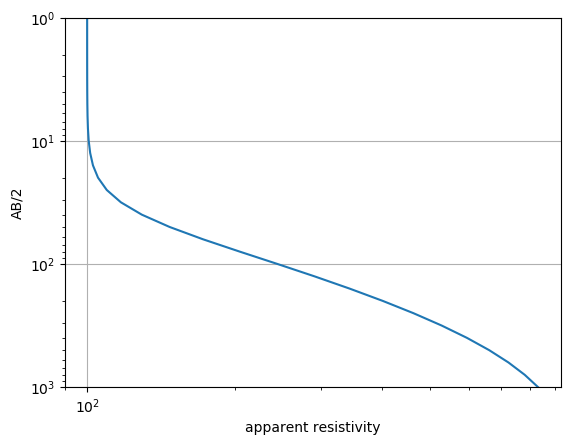

In [64]:
rho = ones(length(thk)+1) * 100
rho[end] = 1000
rhoa = fRho(rho).array()
loglog(rhoa, ab2)
grid()
ylim(ab2[end], ab2[1])
xlabel("apparent resistivity")
ylabel("AB/2");

Install the PyCall by calling
```
using Pkg
Pkg.add("PyCall")
```
Make sure pyGIMLi is installed by calling on the Anaconda command line
```
conda install -c gimli -c conda-forge pygimli=1.1
```

## Task
1. Write a Julia function using the variable-layer forward operator 
1. Write a Julia function using the fixed-layer forward operator 
1. generate a synthetic three-layer model and compute its forward response
1. write a function for computing the Jacobian matrix using the perturbation method
$$ \frac{\partial {\bf f}({\bf m})}{\partial m_j} \approx
\frac{{\bf f}({\bf m} + \delta_j\Delta m )-{\bf f}({\bf m})}{\Delta m} $$
1. Start with a homogeneous resistivity model.
1. compute its Jacobian matrix and display it using matshow

## Task 2:
Generate a three-layer model of which the first and last resistivity model and the thickness of the first layer is assumed constant. Vary the second layer resistivity and thickness over a certain range and plot the resulting objective function $\|d-f(m)\|^2$  as a matrix.